# Laboratorio descenso por gradiente

Integrantes:

- Martin Rodriguez Turco
- Agustín Galdeman
- Ian Cruz Diaz

In [9]:
from scipy.linalg import solve_toeplitz
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Implementación del algroitmo de descenso de Gradiente

Se plantea el algoritmo como se ven en las ecuaciones a continuación:

$$\omega(n+1) = \omega(n)-\frac{1}{2} \mu \nabla J(\omega)$$

Siendo:

$$J(\omega) = \sigma^2_d - \omega^{H}(n)p - p^{H} \omega(n) + \omega^{H}(n)R\omega(n)$$ 

Entonces queda que:

$$\nabla J(\omega) = -2p+2R\omega(n)$$

Finalmente quedando:

$$\omega(n+1) = \omega(n) + \mu \left( p - R \omega(n) \right)$$

In [10]:
"""Filtrado óptimo Wiener con descenso por gradiente.

22.46 Procesamiento adaptativo de Señales Aleatorias
"""
import numpy as np
def steepest_descent(R, p, w0, mu, N):
  """
  Implementa el filtrado óptimo Wiener con descenso por gradiente.
  Argumentos:
    R: matriz de autocorrelación
    p: matriz de correlación cruzada
    w0: valor inicial de los coeficientes del filtro
    mu: tamaño de paso
    N: número máximo de iteraciones
  Devuelve:
    Una matriz de tipo np.array en cuyas filas están
    los coeficientes w para cada paso.

  """
  Wt = np.zeros((N, len(w0)))
  Wt[0] = w0
  for n, w_n_1 in enumerate(Wt):
    if n != len(Wt)-1:
      grad_J_2 = p - np.matmul(R, w_n_1)
      Wt[n+1] = w_n_1 + mu * grad_J_2
  return Wt

In [11]:
R = [[2,1],[1,2]]
p = [6,4]
mu = 0.1
N = 1000
wo = [0,0]
sigma_d = np.sqrt(20)
matrix = steepest_descent(R, p, wo, mu, N)

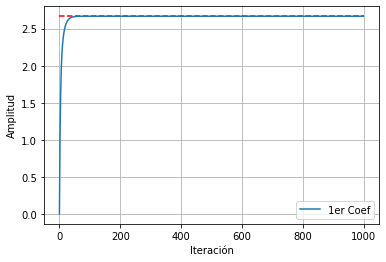

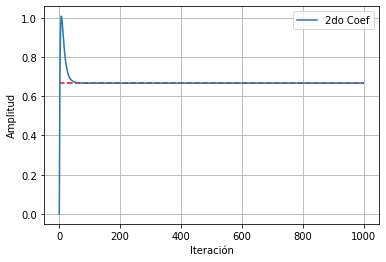

In [12]:
w_optimo = np.dot(np.linalg.inv(R),p)
plt.plot(matrix[:,0],label = "1er Coef");
plt.hlines(w_optimo[0],0,1000,colors= 'r',linestyles= '--');
plt.xlabel("Iteración");
plt.ylabel("Amplitud");
plt.legend();
plt.grid();
plt.show();
plt.plot(matrix[:,1],label = "2do Coef");
plt.hlines(w_optimo[1],0,1000,colors= 'r',linestyles= '--');
plt.xlabel("Iteración");
plt.ylabel("Amplitud");
plt.legend();
plt.grid();
plt.show();

Para el filtro optimo de Wiener la solucion es:

$$\omega_o = R^{-1} p$$

In [13]:
w_optimo = np.dot(np.linalg.inv(R),p)
print(w_optimo)

[2.66666667 0.66666667]


## Curva de error $J(\omega)$

In [14]:
J_w_n = []
for w in matrix:
  J_w = sigma_d**2 - np.dot(w,p) -np.dot(p,w) + np.dot(w,np.matmul(R,w))
  J_w_n.append(J_w)

Text(0, 0.5, 'Error cuadrático medio')

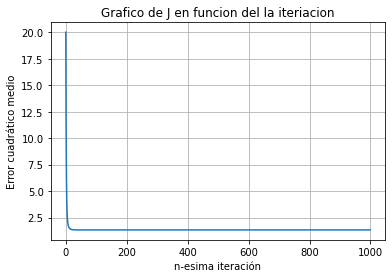

In [15]:
plt.plot(J_w_n)
plt.grid(which= "both")
plt.title("Grafico de J en funcion del la iteriacion")
plt.xlabel("n-esima iteración")
plt.ylabel("Error cuadrático medio")

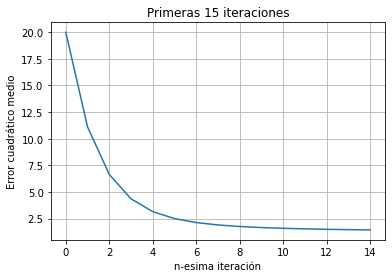

In [16]:
plt.plot(J_w_n[:15]);
plt.grid(which= "both");
plt.title("Primeras 15 iteraciones");
plt.xlabel("n-esima iteración");
plt.ylabel("Error cuadrático medio");

In [17]:
print(f"Valor final de J = {J_w_n[-1]}")

Valor final de J = 1.3333333333333393


## Cota de parámetro de paso

Se define la cota del parametro de paso como:

$$0<\mu < \frac{2}{\lambda_{max}}$$

Siendo $\lambda_{max}$ el autovalor mas grande de R

In [18]:
## Calculamos los autovalores y autovectores

ava = np.linalg.eig(R)[0]
ave = np.linalg.eig(R)[1]

## Calculo la cota superior del parámetro de paso
mu_max = 2/np.max(ava)
print(f"mu_max = {mu_max}")

mu_max = 0.6666666666666666


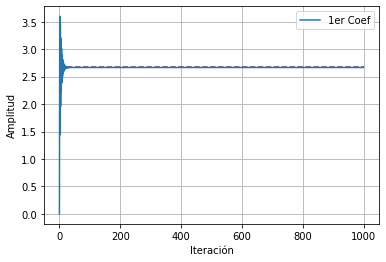

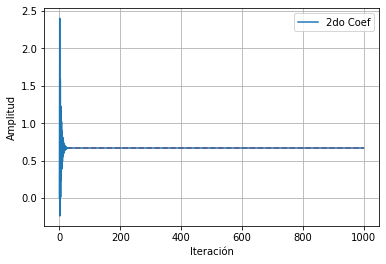

In [19]:
## Tomamos un valor cercano al maximo

mu = 0.6
matrix = steepest_descent(R, p, wo, mu, N)

## Ploteamos

plt.plot(matrix[:,0],label = "1er Coef");
plt.hlines(w_optimo[0],0,1000,colors= 'r',linestyles= '--');
plt.xlabel("Iteración");
plt.ylabel("Amplitud");
plt.legend();
plt.grid();
plt.show();
plt.plot(matrix[:,1],label = "2do Coef");
plt.hlines(w_optimo[1],0,1000,colors= 'r',linestyles= '--');
plt.xlabel("Iteración");
plt.ylabel("Amplitud");
plt.legend();
plt.grid();
plt.show();

En el caso en que $R$ y $p$ sean variables en el tiempo, el metodo de descenso por gradiente es superior al metodo de wiener porque no requiere de la inversión matricial, alivianando la potencia de calculo del procesador utilizado. A su vez, el orden de complejidad algoritmica es $O(n^2)$ mientras que el método de Wiener es de $O(n^3)$.

## Test Steepest Descent

In [20]:
"""Prueba de filtrado óptimo Wiener con descenso por gradiente.

22.46 Procesamiento adaptativo de Señales Aleatorias
"""
import math
import numpy as np
from scipy import signal
from scipy.io import wavfile
from scipy.linalg import toeplitz
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Lee archivo de entrada
fs, d = wavfile.read('/content/drive/Shared drives/PASA/TP4 GDS/4. Laboratorio de descenso por gradiente/Tamara_Laurel_-_Sweet_extract.wav')
d = np.float32(d)

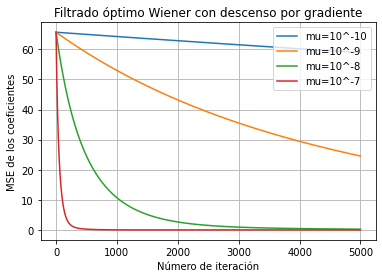

In [21]:
# Simula un canal
def simulate_channel(y, snr_db):
    w = [1.0000, 2.4156, 2.2226, 0.9578, 0.1884, 0.0130];
    u = signal.filtfilt(1, w, y);

    # Añade ruido blanco
    Pmeas = np.var(y);
    snr = 10 ** (snr_db / 10);
    P_noise = Pmeas / snr;
    additive_white_noise = math.sqrt(P_noise) * np.random.randn(*u.shape);

    # Simula cuantización
    u = np.round(u + additive_white_noise);

    return (u, w)

# Simula un canal
u, w_true = simulate_channel(d, 80);

# Extrae segmentos de un segundo de ambas señales
s_start = 8;
d = d[s_start * fs:(s_start + 1) * fs];
u = u[s_start * fs:(s_start + 1) * fs];

# Estima la autocorrelación y correlación cruzada
N_THETA = 6;
r = np.correlate(u, u, 'full') / len(u);
r = r[(len(u) - 1):len(u) - 1 + N_THETA];
R = toeplitz(r);

p = np.correlate(d, u, 'full') / len(u);
p = p[(len(u) - 1):len(u) - 1 + N_THETA];

# Determina el filtro óptimo Wiener
w_wiener = inv(R).dot(p);

# Encuentra el filtro óptimo Wiener con descenso por gradiente
mus = [1e-10, 1e-9, 1e-8, 1e-7]; # Diferentes tamaños de paso
w0 = np.zeros(N_THETA);
for mu in mus:
    N = 5000; # Número de iteraciones

    # Llama a la función de filtrado óptimo Wiener con descenso por gradiente.
    # Las filas de Wt representan los filtros en diferentes instantes.
    Wt = steepest_descent(R, p, w0, mu, N);

    # Calcula instante a instante el error cuadrático medio de los
    # coeficientes del filtro respecto de los coeficientes del filtro óptimo.
    mse_coeffs = np.mean((Wt - w_wiener) ** 2, 1)

    plt.plot(mse_coeffs, label='mu=10^%i' % math.log10(mu))

# Representación
plt.xlabel('Número de iteración');
plt.ylabel('MSE de los coeficientes');
plt.title('Filtrado óptimo Wiener con descenso por gradiente');
plt.grid(True);
plt.legend(loc='upper right');
plt.show();


Como se puede observar, a medida que el parámetro de paso se hace mas pequeño, la velocidad de convergencia del algoritmo tiende a disminuir, por lo tanto lo que se puede ver es que con un parámetro de paso de $\mu = 10^{-7}$ se converge mucho mas rapido que con $\mu = 10^{-10}$. Sin embargo ¿Qué sucede cuando $\mu = 10^{-6}$?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in matmul
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':


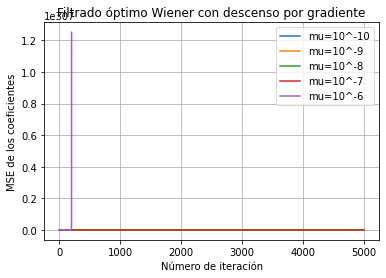

In [22]:
mus = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]; # Diferentes tamaños de paso
w0 = np.zeros(N_THETA);
for mu in mus:
    N = 5000; # Número de iteraciones

    # Llama a la función de filtrado óptimo Wiener con descenso por gradiente.
    # Las filas de Wt representan los filtros en diferentes instantes.
    Wt = steepest_descent(R, p, w0, mu, N);

    # Calcula instante a instante el error cuadrático medio de los
    # coeficientes del filtro respecto de los coeficientes del filtro óptimo.
    mse_coeffs = np.mean((Wt - w_wiener) ** 2, 1)

    plt.plot(mse_coeffs, label='mu=10^%i' % math.log10(mu))

# Representación
plt.xlabel('Número de iteración');
plt.ylabel('MSE de los coeficientes');
plt.title('Filtrado óptimo Wiener con descenso por gradiente');
plt.grid(True);
plt.legend(loc='upper right');
plt.show();

Como se puede observar, aparentemente $\mu = 10^{-6}$ es superior a la cota superior del parámetro de paso, y es por esa razon que el algoritmo en una cierta iteración tiende a diverger. (En la imagen superior se llega a ver que para una cierta iteracion el $MSE > 10^{307}$, lo cual a fines prácticos es equivalente a decir que tiende a $\infty$).